Sebagai seseorang yang baru saja memasuki dunia kerja, mungkin kita semua akan mengalami kebingungan dimulai dari di daerah mana kita akan bekerja, berapa upah yang akan didapatkan, serta apakah pendapatan tersebut akan mencukupi untuk kebutuhan sehari-hari. Melalui beberapa data yang bersumber dari Badan Pusat Statistik (BPS), dashboard ini mencoba membantu pekerja dalam memilih tempat bekerja berdasarkan beberapa variabel seperti pendapatan dan pengeluaran. Beberapa hal tersebut menjadikan Dashboard Pekerja Sejahtera ini sangat penting dan relevan sebab kondisi persaingan dunia kerja yang sangat ketat sehingga bagi pekerja tentu dibutuhkan perencanaan yang matang termasuk memikirkan kesejahteraannya berdasarkan pilihan-pilihan yang telah dibuat.

    upah.df.csv: dataset Rata-Rata Upah Pekerja Per Jam dengan disagregasi Provinsi dan Tahun
    ump.df.csv: dataset Upah Minimum Provinsi (UMP) dengan disagregasi Provinsi dan Tahun
    gk.df.csv: dataset **Garis Kemiskinan Per Kapita **dengan disagregasi Provinsi, Tahun, Periode Survei, Jenis Pengeluaran, dan Daerah Tempat Tinggal.
    peng.df.csv: dataset Rata-Rata Pengeluaran Per Kapita dengan disagregasi Provinsi, Tahun, Jenis Pengeluaran, dan Daerah Tempat Tinggal.


# SMART Question 
1. Specifict
- apa saja 5 provinsi dengan upah tertinggi dan terendah ?

2. Measurable
- berapa UMP dalam 5 provinsi tertinggi dan terendah ?

3. Action-oriented
- Bagaimana cara meningkatkan UMP setiap provinsi yang terendah? untuk mendapatkan upah yang layak agar mengatasi garis kemiskinan 

4. Relavant 
-  Bagaimana mengatasi garis kemiskinan untuk pekerja mendapatkan upah yang layak agar mengatasi permasalahan pengeluaran, untuk kesejahteraan pekerja tersebut?

5. Time-Bounded
- Bagaimana tren rata-rata upah pekerja per jam di berbagai provinsi selama beberapa tahun terakhir?


# Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
plt.style.use('Solarize_Light2')

# Data Wrangling

## Gathering Data

In [2]:
df_gk = pd.read_csv('../datasets/kesejahteraanPekerjaanIndonesia/gk.df.csv')
df_peng = pd.read_csv('../datasets/kesejahteraanPekerjaanIndonesia/peng.df.csv')
df_ump = pd.read_csv('../datasets/kesejahteraanPekerjaanIndonesia/ump.df.csv')
df_upah = pd.read_csv('../datasets/kesejahteraanPekerjaanIndonesia/upah.df.csv')

In [3]:
print('Garis Kemiskinan Per Kapita yang ada di indonesia\n', df_gk.head())

Garis Kemiskinan Per Kapita yang ada di indonesia
   provinsi    jenis     daerah  tahun    periode        gk
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  293697.0
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  306243.0
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  319768.0
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  297479.0


In [4]:
print('Rata-rata pengeluaran dan daerah tempat tinggal yang ada di indonesia \n', df_peng.head())

Rata-rata pengeluaran dan daerah tempat tinggal yang ada di indonesia 
   provinsi     daerah    jenis  tahun      peng
0     ACEH  PERDESAAN  MAKANAN   2007  195176.0
1     ACEH  PERDESAAN  MAKANAN   2008  218781.0
2     ACEH  PERDESAAN  MAKANAN   2009  247427.0
3     ACEH  PERDESAAN  MAKANAN   2010  275749.0
4     ACEH  PERDESAAN  MAKANAN   2011  308000.0


In [5]:
print('Upah Minimum Provinsi yang ada di indonesia \n', df_ump.head())

Upah Minimum Provinsi yang ada di indonesia 
   provinsi  tahun       ump
0     ACEH   2002  330000.0
1     ACEH   2003  425000.0
2     ACEH   2004  550000.0
3     ACEH   2005  620000.0
4     ACEH   2006  820000.0


In [6]:
print('Rata-rata Upah Pekerja Per jam yang ada di indonesia \n', df_upah.head())

Rata-rata Upah Pekerja Per jam yang ada di indonesia 
   provinsi  tahun   upah
0     ACEH   2015  11226
1     ACEH   2016  13627
2     ACEH   2017  14809
3     ACEH   2018  13814
4     ACEH   2019  15065


## Assesing Data

### Menilai tabal garis kemiskinan

In [7]:
df_gk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB


### Missing Value
- Dataset Garis Kemiskinan

In [8]:
df_gk.isna().sum()

provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

### Duplicated Data

In [9]:
print('Jumlah Duplikasi : ', df_gk.duplicated().sum())
df_gk.describe().style.background_gradient(cmap='RdPu')

Jumlah Duplikasi :  0


,tahun,gk
count,5460.000000,5261.000000
mean,2018.115385,303904.185516
std,2.577159,158176.024903
min,2013.000000,48561.000000
25%,2016.000000,144674.000000
50%,2018.000000,313294.000000
75%,2020.000000,410188.000000
max,2022.000000,872843.000000


### Menilai Tabel pengeluaran

In [10]:
df_peng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4620 non-null   object 
 1   daerah    4620 non-null   object 
 2   jenis     4620 non-null   object 
 3   tahun     4620 non-null   int64  
 4   peng      4512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.6+ KB


### Missng Value
- Dataset Pengeluaran

In [11]:
df_peng.isna().sum()

provinsi      0
daerah        0
jenis         0
tahun         0
peng        108
dtype: int64

### Duplicated

In [12]:
print('Jumlah Duplikasi : ', df_peng.duplicated().sum())
df_peng.describe().style.background_gradient(cmap='RdPu')

Jumlah Duplikasi :  0


,tahun,peng
count,4620.000000,4512.000000
mean,2015.045455,601201.168661
std,4.416124,352405.192684
min,2007.000000,59216.000000
25%,2011.750000,347627.250000
50%,2015.000000,520694.500000
75%,2019.000000,757732.500000
max,2022.000000,2525347.000000


### Entries Clear

### Menilai tabel upah pekerja

In [13]:
df_upah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   provinsi  280 non-null    object
 1   tahun     280 non-null    int64 
 2   upah      280 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.7+ KB


### Duplicated

In [14]:
print('Jumlah Duplikasi : ', df_upah.duplicated().sum())
df_upah.describe().style.background_gradient(cmap='RdPu')

Jumlah Duplikasi :  0


,tahun,upah
count,280.000000,280.000000
mean,2018.500000,16621.010714
std,2.295390,4371.803056
min,2015.000000,8525.000000
25%,2016.750000,13468.750000
50%,2018.500000,15845.000000
75%,2020.250000,18634.750000
max,2022.000000,32685.000000


### Menilai tabel ump

In [15]:
df_ump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  735 non-null    object 
 1   tahun     735 non-null    int64  
 2   ump       711 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.4+ KB


### Missing Value
- Dataset UMP

In [16]:
df_ump.isna().sum()

provinsi     0
tahun        0
ump         24
dtype: int64

### Duplicated

In [17]:
print('Jumlah Duplikasi : ', df_ump.duplicated().sum())
df_ump.describe().style.background_gradient(cmap='RdPu')

Jumlah Duplikasi :  0


,tahun,ump
count,735.000000,711.000000
mean,2012.000000,1402290.452883
std,6.059424,876262.234824
min,2002.000000,245000.000000
25%,2007.000000,663986.500000
50%,2012.000000,1125207.000000
75%,2017.000000,2074002.500000
max,2022.000000,4641854.000000


## Data Cleaning

### metode imputation

In [18]:
df_gk[df_gk.gk.isna()]

,provinsi,jenis,daerah,tahun,periode,gk
104,ACEH,TOTAL,PERDESAANPERKOTAAN,2013,MARET,NaN
105,ACEH,TOTAL,PERDESAANPERKOTAAN,2013,SEPTEMBER,NaN
106,ACEH,TOTAL,PERDESAANPERKOTAAN,2014,MARET,NaN
107,ACEH,TOTAL,PERDESAANPERKOTAAN,2014,SEPTEMBER,NaN
260,SUMATERA UTARA,TOTAL,PERDESAANPERKOTAAN,2013,MARET,NaN
...,...,...,...,...,...,...
5255,PAPUA,TOTAL,PERDESAANPERKOTAAN,2014,SEPTEMBER,NaN
5408,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2013,MARET,NaN
5409,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2013,SEPTEMBER,NaN
5410,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2014,MARET,NaN


In [19]:
df_gk.gk.value_counts()

gk
161688.0    2
275361.0    2
214245.0    2
215491.0    2
218306.0    2
           ..
330526.0    1
318487.0    1
302894.0    1
350614.0    1
535547.0    1
Name: count, Length: 5191, dtype: int64

In [20]:
df_gk['gk'].fillna(df_gk['gk'].mean(), inplace=True)
print(df_gk.isna().sum())

provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64


In [21]:
df_peng[df_peng.peng.isna()]

,provinsi,daerah,jenis,tahun,peng
1320,DKI JAKARTA,PERDESAAN,MAKANAN,2007,NaN
1321,DKI JAKARTA,PERDESAAN,MAKANAN,2008,NaN
1322,DKI JAKARTA,PERDESAAN,MAKANAN,2009,NaN
1323,DKI JAKARTA,PERDESAAN,MAKANAN,2010,NaN
1324,DKI JAKARTA,PERDESAAN,MAKANAN,2011,NaN
...,...,...,...,...,...
3147,KALIMANTAN UTARA,PERDESAANPERKOTAAN,NONMAKANAN,2014,NaN
3156,KALIMANTAN UTARA,PERDESAANPERKOTAAN,TOTAL,2011,NaN
3157,KALIMANTAN UTARA,PERDESAANPERKOTAAN,TOTAL,2012,NaN
3158,KALIMANTAN UTARA,PERDESAANPERKOTAAN,TOTAL,2013,NaN


In [22]:
df_peng.peng.value_counts()

peng
1708275.0    2
1085089.0    2
884071.0     2
898019.0     2
953320.0     2
            ..
144292.0     1
180606.0     1
181006.0     1
201336.0     1
1327782.0    1
Name: count, Length: 4470, dtype: int64

In [23]:
mean_value_peng = df_peng['peng'].mean()
df_peng['peng'].fillna(mean_value_peng, inplace=True)
print(df_peng.isna().sum())

provinsi    0
daerah      0
jenis       0
tahun       0
peng        0
dtype: int64


### Not Missing Values

In [24]:
print(df_upah.isna().sum())

provinsi    0
tahun       0
upah        0
dtype: int64


In [25]:
df_ump[df_ump.ump.isna()]

,provinsi,tahun,ump
189,KEP. RIAU,2002,NaN
190,KEP. RIAU,2003,NaN
191,KEP. RIAU,2004,NaN
483,KALIMANTAN UTARA,2002,NaN
484,KALIMANTAN UTARA,2003,NaN
485,KALIMANTAN UTARA,2004,NaN
486,KALIMANTAN UTARA,2005,NaN
487,KALIMANTAN UTARA,2006,NaN
488,KALIMANTAN UTARA,2007,NaN
489,KALIMANTAN UTARA,2008,NaN


In [26]:
df_ump.ump.value_counts()

ump
1000000.0    10
600000.0      6
500000.0      5
425000.0      5
700000.0      5
             ..
1812935.0     1
1742015.0     1
1605396.0     1
1486065.0     1
2729463.0     1
Name: count, Length: 562, dtype: int64

In [27]:
mean_value_ump = df_ump['ump'].mean()
df_ump['ump'].fillna(mean_value_ump, inplace=True)
print(df_ump.isna().sum())

provinsi    0
tahun       0
ump         0
dtype: int64


In [28]:
df_gk.describe().style.background_gradient(cmap='RdPu')

,tahun,gk
count,5460.000000,5460.000000
mean,2018.115385,303904.185516
std,2.577159,155266.220703
min,2013.000000,48561.000000
25%,2016.000000,149278.000000
50%,2018.000000,305580.000000
75%,2020.000000,405551.250000
max,2022.000000,872843.000000


In [29]:
df_peng.describe().style.background_gradient(cmap='RdPu')

,tahun,peng
count,4620.000000,4620.000000
mean,2015.045455,601201.168661
std,4.416124,348260.910836
min,2007.000000,59216.000000
25%,2011.750000,352898.500000
50%,2015.000000,530730.500000
75%,2019.000000,752737.250000
max,2022.000000,2525347.000000


In [30]:
df_upah.describe().style.background_gradient(cmap='RdPu')

,tahun,upah
count,280.000000,280.000000
mean,2018.500000,16621.010714
std,2.295390,4371.803056
min,2015.000000,8525.000000
25%,2016.750000,13468.750000
50%,2018.500000,15845.000000
75%,2020.250000,18634.750000
max,2022.000000,32685.000000


In [31]:
df_ump.describe().style.background_gradient(cmap='RdPu')

,tahun,ump
count,735.000000,735.000000
mean,2012.000000,1402290.452883
std,6.059424,861817.362419
min,2002.000000,245000.000000
25%,2007.000000,674100.000000
50%,2012.000000,1180000.000000
75%,2017.000000,2035000.000000
max,2022.000000,4641854.000000


# Explanatory Data Analysis

In [32]:
upah_2022  = df_upah[df_upah['tahun'] == 2022].copy()
upah_2022_sorted = upah_2022.sort_values(by='upah', ascending=True)

upah_5_tertinggi = upah_2022_sorted.tail(5)
print('5 Provinsi upah tertinggi\n',pd.DataFrame(upah_5_tertinggi))

5 Provinsi upah tertinggi
         provinsi  tahun   upah
79     KEP. RIAU   2022  23528
127       BANTEN   2022  23880
271        PAPUA   2022  24097
263  PAPUA BARAT   2022  24128
87   DKI JAKARTA   2022  32685


In [33]:
upah_5_terendah = upah_2022_sorted.head(5)
print('5 Provinsi upah terendah\n',pd.DataFrame(upah_5_terendah))

5 Provinsi upah terendah
                 provinsi  tahun   upah
143  NUSA TENGGARA BARAT   2022  11734
103          JAWA TENGAH   2022  12604
151  NUSA TENGGARA TIMUR   2022  13012
63               LAMPUNG   2022  13218
231            GORONTALO   2022  14289


In [34]:
ump_2022 = df_ump[df_ump['tahun'] == 2022].copy()
ump_2022_sorted = ump_2022.sort_values(by='ump', ascending=True)

ump_5_tertinggi = ump_2022_sorted.tail(5)
print('5 Provinsi UMP tertinggi\n', pd.DataFrame(ump_5_tertinggi))

5 Provinsi UMP tertinggi
                  provinsi  tahun        ump
692           PAPUA BARAT   2022  3200000.0
188  KEP. BANGKA BELITUNG   2022  3264884.0
524        SULAWESI UTARA   2022  3310723.0
713                 PAPUA   2022  3561932.0
230           DKI JAKARTA   2022  4641854.0


In [35]:
ump_5_terendah = ump_2022_sorted.head(5)
print('5 provinsi UMP terendah\n', pd.DataFrame(ump_5_terendah))

5 provinsi UMP terendah
                 provinsi  tahun        ump
272          JAWA TENGAH   2022  1812935.0
293        DI YOGYAKARTA   2022  1840916.0
251           JAWA BARAT   2022  1841487.0
314           JAWA TIMUR   2022  1891567.0
398  NUSA TENGGARA TIMUR   2022  1975000.0


In [36]:
provinsi = ['PAPUA BARAT', 'KEP. BANGKA BELITUNG', 'SULAWESI UTARA', 
            'PAPUA', 'DKI JAKARTA', 'JAWA TENGAH',
            'DI YOGYAKARTA', 'JAWA BARAT', 'JAWA TIMUR',
            'NUSA TENGGARA TIMUR']
ump_filtered = df_ump[df_ump['provinsi'].isin(provinsi)]
print(ump_filtered)

                 provinsi  tahun        ump
168  KEP. BANGKA BELITUNG   2002   345000.0
169  KEP. BANGKA BELITUNG   2003   379500.0
170  KEP. BANGKA BELITUNG   2004   447900.0
171  KEP. BANGKA BELITUNG   2005   560000.0
172  KEP. BANGKA BELITUNG   2006   640000.0
..                    ...    ...        ...
709                 PAPUA   2018  3000000.0
710                 PAPUA   2019  3240900.0
711                 PAPUA   2020  3516700.0
712                 PAPUA   2021  3516700.0
713                 PAPUA   2022  3561932.0

[210 rows x 3 columns]


In [37]:
# provinsi = ['DKI JAKARTA','PAPUA BARAT','PAPUA','BANTEN','KEP.RIAU',
#             'GORONTALO','LAMPUNG','NUSA TENGGARA TIMUR','JAWA TENGAH',
#             'NUSA TENGGARA BARAT']
# ump_filtered = df_ump[df_ump['provinsi'].isin(provinsi)]
# print(ump_filtered)

In [38]:
correlation = df_gk['gk'].corr(df_peng['peng'])
correlation

-0.0054055876174404225

In [39]:
correlation = df_upah['upah'].corr(df_peng['peng'])
correlation

0.1985417900145426

In [40]:
upah_provinsi = df_upah[(df_upah['provinsi'] == 'INDONESIA')]

print(upah_provinsi)

      provinsi  tahun   upah
272  INDONESIA   2015  11434
273  INDONESIA   2016  14068
274  INDONESIA   2017  14731
275  INDONESIA   2018  15275
276  INDONESIA   2019  15823
277  INDONESIA   2020  17696
278  INDONESIA   2021  18089
279  INDONESIA   2022  17542


In [41]:
# Menggabungkan df_ump dan df_gk berdasarkan 'provinsi'
df_combined = pd.merge(
    left=df_ump, 
    right=df_gk,
    how= 'left',
    left_on='provinsi',
    right_on='provinsi'
)

df_combined.head()


,provinsi,tahun_x,ump,jenis,daerah,tahun_y,periode,gk
0,ACEH,2002,330000.0,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,2002,330000.0,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,2002,330000.0,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,2002,330000.0,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,2002,330000.0,MAKANAN,PERDESAAN,2015,MARET,297479.0


In [42]:
df_combined.groupby('provinsi').agg({
    'gk': lambda x: list(x),
    'ump': lambda x: list(x),
    'tahun_x': lambda x: sorted(x.unique().tolist())  # Mengurutkan tahun secara unik
})

,gk,ump,tahun_x
provinsi,,,
ACEH,"[293697.0, 302128.0, 306243.0, 319768.0, 29747...","[330000.0, 330000.0, 330000.0, 330000.0, 33000...","[2002, 2003, 2004, 2005, 2006, 2007, 2008, 200..."
BALI,"[226679.0, 231680.0, 237835.0, 242429.0, 21435...","[341000.0, 341000.0, 341000.0, 341000.0, 34100...","[2002, 2003, 2004, 2005, 2006, 2007, 2008, 200..."
BANTEN,"[235211.0, 248503.0, 256536.0, 261285.0, 24125...","[360000.0, 360000.0, 360000.0, 360000.0, 36000...","[2002, 2003, 2004, 2005, 2006, 2007, 2008, 200..."
BENGKULU,"[288387.0, 313872.0, 315710.0, 335957.0, 30305...","[295000.0, 295000.0, 295000.0, 295000.0, 29500...","[2002, 2003, 2004, 2005, 2006, 2007, 2008, 200..."
DI YOGYAKARTA,"[238042.0, 249320.0, 254284.0, 257677.0, 23634...","[321800.0, 321800.0, 321800.0, 321800.0, 32180...","[2002, 2003, 2004, 2005, 2006, 2007, 2008, 200..."
DKI JAKARTA,"[319595.0, 327678.0, 329644.0, 334938.0, 30390...","[591300.0, 591300.0, 591300.0, 591300.0, 59130...","[2002, 2003, 2004, 2005, 2006, 2007, 2008, 200..."
GORONTALO,"[191995.0, 201515.0, 209232.0, 211756.0, 20798...","[375000.0, 375000.0, 375000.0, 375000.0, 37500...","[2002, 2003, 2004, 2005, 2006, 2007, 2008, 200..."
INDONESIA,"[238278.0, 247840.0, 255181.0, 259886.0, 24535...","[362700.0, 362700.0, 362700.0, 362700.0, 36270...","[2002, 2003, 2004, 2005, 2006, 2007, 2008, 200..."
JAMBI,"[297507.0, 308379.0, 319954.0, 328157.0, 24765...","[304000.0, 304000.0, 304000.0, 304000.0, 30400...","[2002, 2003, 2004, 2005, 2006, 2007, 2008, 200..."


In [43]:
df_combined.to_csv('df_combined.csv', index=False)

In [44]:
# Menggabungkan df_ump dan df_gk berdasarkan 'provinsi'
df_gk_peng = pd.merge(
    left=df_gk, 
    right=df_peng,
    how= 'left',
    left_on='provinsi',
    right_on='provinsi'
)

df_gk_peng.head()

,provinsi,jenis_x,daerah_x,tahun_x,periode,gk,daerah_y,jenis_y,tahun_y,peng
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0,PERDESAAN,MAKANAN,2007,195176.0
1,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0,PERDESAAN,MAKANAN,2008,218781.0
2,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0,PERDESAAN,MAKANAN,2009,247427.0
3,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0,PERDESAAN,MAKANAN,2010,275749.0
4,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0,PERDESAAN,MAKANAN,2011,308000.0


In [45]:
df_gk_peng.groupby('provinsi').agg({
    'gk': lambda x: list(x),
    'peng': lambda x: list(x),
    'tahun_x': lambda x: sorted(x.unique().tolist())  # Mengurutkan tahun secara unik
})

,gk,peng,tahun_x
provinsi,,,
ACEH,"[293697.0, 293697.0, 293697.0, 293697.0, 29369...","[195176.0, 218781.0, 247427.0, 275749.0, 30800...","[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202..."
BALI,"[226679.0, 226679.0, 226679.0, 226679.0, 22667...","[167040.0, 167920.0, 183935.0, 234204.0, 27770...","[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202..."
BANTEN,"[235211.0, 235211.0, 235211.0, 235211.0, 23521...","[154658.0, 180920.0, 195712.0, 234517.0, 26238...","[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202..."
BENGKULU,"[288387.0, 288387.0, 288387.0, 288387.0, 28838...","[153883.0, 185289.0, 195910.0, 239474.0, 28180...","[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202..."
DI YOGYAKARTA,"[238042.0, 238042.0, 238042.0, 238042.0, 23804...","[131247.0, 141612.0, 159436.0, 195603.0, 22394...","[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202..."
DKI JAKARTA,"[319595.0, 319595.0, 319595.0, 319595.0, 31959...","[601201.1686613475, 601201.1686613475, 601201....","[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202..."
GORONTALO,"[191995.0, 191995.0, 191995.0, 191995.0, 19199...","[119765.0, 133510.0, 147191.0, 194224.0, 22625...","[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202..."
INDONESIA,"[238278.0, 238278.0, 238278.0, 238278.0, 23827...","[148613.0, 166583.0, 186741.0, 219803.0, 25492...","[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202..."
JAMBI,"[297507.0, 297507.0, 297507.0, 297507.0, 29750...","[179472.0, 200524.0, 214071.0, 259432.0, 31228...","[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202..."


In [46]:
df_gk_peng.to_csv('df_combined2.csv', index=False)

# Exploratory Data Analysis (EDA)

1. Specifict
- apa saja 5 provinsi dengan upah tertinggi dan terendah ?

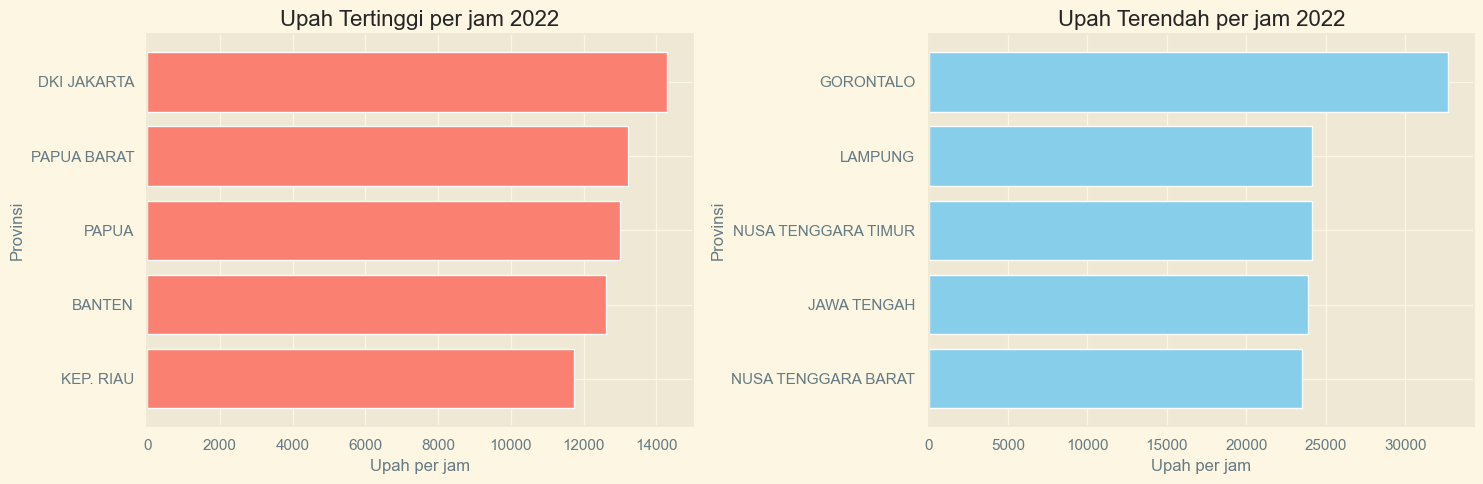

In [47]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.barh(upah_5_tertinggi['provinsi'], upah_5_terendah['upah'], color='salmon')
plt.title('Upah Tertinggi per jam 2022')
plt.xlabel('Upah per jam')
plt.ylabel('Provinsi')

plt.subplot(1, 2, 2)
plt.barh(upah_5_terendah['provinsi'], upah_5_tertinggi['upah'], color='skyblue')
plt.title('Upah Terendah per jam 2022')
plt.xlabel('Upah per jam')
plt.ylabel('Provinsi')

plt.tight_layout()
plt.show()

2. Measurable
- berapa UMP dalam 5 provinsi tertinggi dan terendah ?

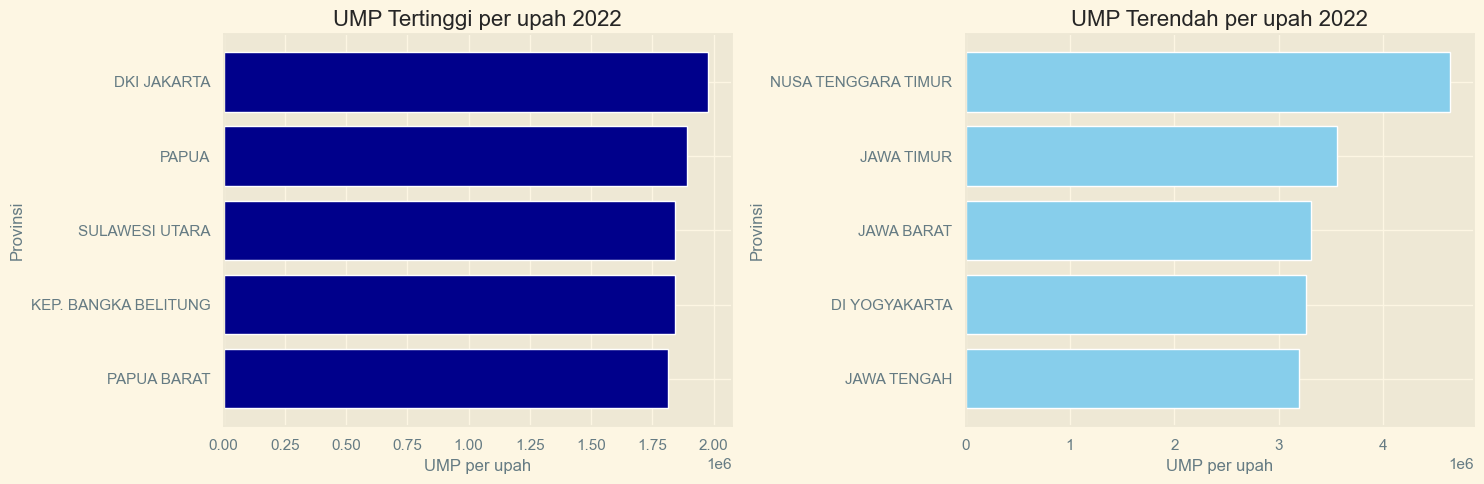

In [48]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.barh(ump_5_tertinggi['provinsi'], ump_5_terendah['ump'], color='darkblue')
plt.title('UMP Tertinggi per upah 2022')
plt.xlabel('UMP per upah')
plt.ylabel('Provinsi')

plt.subplot(1, 2, 2)
plt.barh(ump_5_terendah['provinsi'], ump_5_tertinggi['ump'], color='skyblue')
plt.title('UMP Terendah per upah 2022')
plt.xlabel('UMP per upah')
plt.ylabel('Provinsi')

plt.tight_layout()
plt.show()

3. Action-oriented
- Bagaimana cara meningkatkan UMP setiap provinsi yang terendah? untuk mendapatkan upah yang layak agar mengatasi garis kemiskinan 

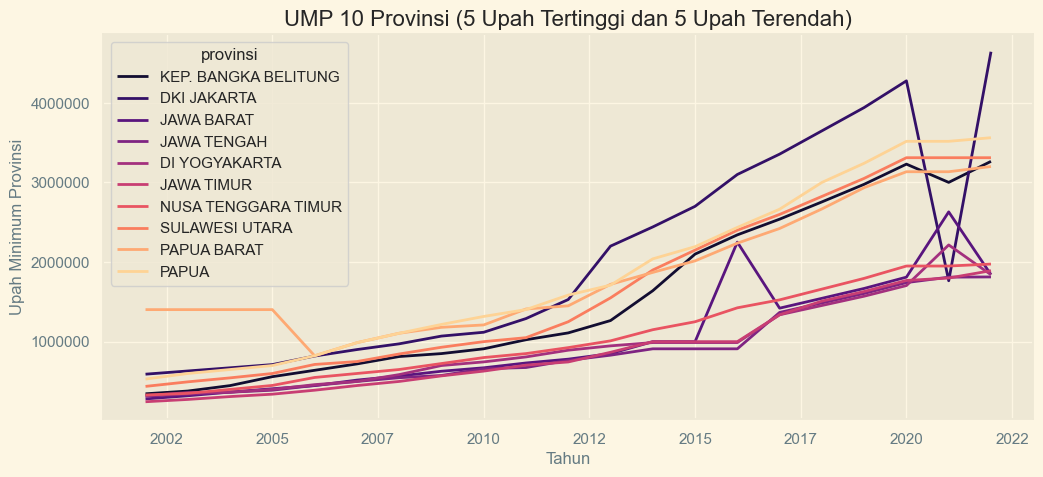

In [49]:
# Menggunakan palet warna yang cerah
bright_palette = sns.color_palette("magma", 10)

plt.figure(figsize=(12, 5))
sns.lineplot(x="tahun", y="ump", data=ump_filtered, hue='provinsi', palette=bright_palette)
plt.title('UMP 10 Provinsi (5 Upah Tertinggi dan 5 Upah Terendah)')
plt.xlabel('Tahun')
plt.ylabel('Upah Minimum Provinsi')

# Mengatur format label tahun
ax = plt.gca()
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)  # Menonaktifkan notasi ilmiah
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))  # Format tahun tanpa desimal

plt.grid(True)
plt.show()

4. Relavant 
-  Bagaimana mengatasi garis kemiskinan untuk pekerja mendapatkan upah yang layak agar mengatasi permasalahan pengeluaran, untuk kesejahteraan pekerja tersebut?

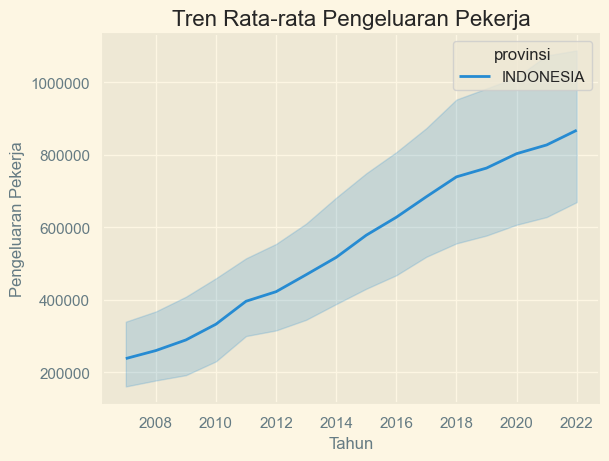

In [50]:
pengeluaran_provinsi = df_peng[(df_peng['provinsi'] == 'INDONESIA') ]

# line chart upah provinsi 
sns.lineplot(x="tahun", y="peng", data=pengeluaran_provinsi, hue='provinsi')
plt.title('Tren Rata-rata Pengeluaran Pekerja')
plt.xlabel('Tahun')
plt.ylabel('Pengeluaran Pekerja')

# Mengatur format label tahun 
ax = plt.gca()
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)  # Menonaktifkan notasi ilmiah
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))  # Format tahun tanpa desimal

plt.show()



In [51]:
# # Menggabungkan df_gk dan df_peng berdasarkan 'provinsi'
# df_gk_peng = pd.merge(left=df_gk, right=df_peng, how='left', left_on='provinsi', right_on='provinsi')

# # Menambahkan kolom 'kelebihan_upah' sebagai selisih antara upah dan garis kemiskinan
# df_gk_peng['kelebihan_upah'] = df_gk_peng['peng'] - df_gk_peng['gk']

# # Menambahkan kolom 'sisa_pengeluaran' sebagai selisih antara pengeluaran dan upah
# df_gk_peng['sisa_pengeluaran'] = df_gk_peng['peng'] - df_gk_peng['gk']

# # Visualisasi hubungan antara kelebihan upah dan sisa pengeluaran
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='kelebihan_upah', y='sisa_pengeluaran', data=df_gk_peng, hue='kelebihan_upah', palette='viridis')
# plt.title('Hubungan Kelebihan Upah dan Sisa Pengeluaran')
# plt.xlabel('Kelebihan Upah')
# plt.ylabel('Sisa Pengeluaran')

# plt.show()

In [52]:
# selected_provinsi = df_upah['provinsi'].unique().tolist()
# selected_provinsi.sort()

# # Memfilter DataFrame berdasarkan provinsi yang diinginkan
# upah_provinsi = df_upah[df_upah['provinsi'].isin(selected_provinsi)]

# # Line chart upah provinsi
# plt.figure(figsize=(10, 6))
# sns.lineplot(x="tahun", y="upah", data=upah_provinsi, hue='provinsi', marker='o')
# plt.title('Tren Rata-rata upah dari pekerja dengan pengeluaran')
# plt.xlabel('Tahun')
# plt.ylabel('Upah Pekerja per Jam')

# # Mengatur format label tahun
# ax = plt.gca()
# formatter = ticker.ScalarFormatter()
# formatter.set_scientific(False)  # Menonaktifkan notasi ilmiah
# ax.yaxis.set_major_formatter(formatter)
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))  # Format tahun tanpa desimal

# # Menempatkan legend di luar area
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

5. Time-Bounded
- Bagaimana tren rata-rata upah pekerja per jam di berbagai provinsi selama beberapa tahun terakhir?

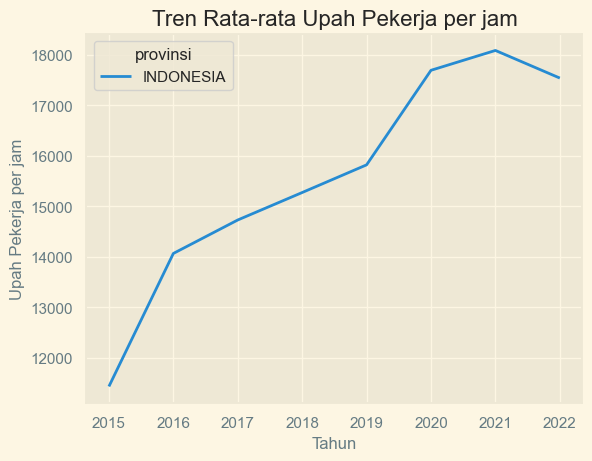

In [53]:
upah_provinsi = df_upah[(df_upah['provinsi'] == 'INDONESIA') ]

# line chart upah provinsi 
sns.lineplot(x="tahun", y="upah", data=upah_provinsi, hue='provinsi')
plt.title('Tren Rata-rata Upah Pekerja per jam')
plt.xlabel('Tahun')
plt.ylabel('Upah Pekerja per jam')

# Mengatur format label tahun 
ax = plt.gca()
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)  # Menonaktifkan notasi ilmiah
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))  # Format tahun tanpa desimal

plt.show()

# Data Preprocessing 

In [54]:
gkYearly = df_gk.query("tahun >= 2015").groupby(['tahun', 'provinsi'])['gk'].mean().round(0)
umpYearly = df_ump.query("tahun >= 2015").groupby(['tahun', 'provinsi'])['ump'].mean().round(0)
pengeluaranYearly = df_peng.query("tahun >= 2015").groupby(['tahun', 'provinsi'])['peng'].mean().round(0)
upahYearly = df_upah.query("tahun >= 2015").groupby(['tahun', 'provinsi'])['upah'].mean().round(0)

# Menggabungkan sumber data menjadi 1 dataframe
resultNotIndexed = pd.concat([gkYearly, umpYearly, pengeluaranYearly, upahYearly], axis=1, join='outer')
all_df = pd.concat([gkYearly, umpYearly, pengeluaranYearly, upahYearly], axis=1, join='outer').reset_index()

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(all_df)

# merubah nama kolom
all_df.rename(columns = {'tahun':'Year', 'provinsi':'Province', 'ump':'Min-Monthly-Salary', 'gk':'Poverty-Line', 'peng':'Monthly-Expense', 'upah':'Avg-Hourly-Salary'}, inplace = True)

print(all_df)

     tahun           provinsi        gk        ump      peng     upah
0     2015               ACEH  266577.0  1900000.0  534164.0  11226.0
1     2015               BALI  216182.0  1621172.0  678932.0  11038.0
2     2015             BANTEN  228726.0  1600000.0  644492.0  14228.0
3     2015           BENGKULU  265594.0  1500000.0  562637.0  12491.0
4     2015      DI YOGYAKARTA  225278.0   988500.0  585323.0  10440.0
..     ...                ...       ...        ...       ...      ...
275   2022  SULAWESI TENGGARA  280516.0  2710596.0  769230.0  17542.0
276   2022     SULAWESI UTARA  293572.0  3310723.0  819368.0  18335.0
277   2022     SUMATERA BARAT  421526.0  2512539.0  896838.0  15887.0
278   2022   SUMATERA SELATAN  335999.0  3144446.0  784480.0  15978.0
279   2022     SUMATERA UTARA  383272.0  2522610.0  802326.0  15131.0

[280 rows x 6 columns]
     Year           Province  Poverty-Line  Min-Monthly-Salary  Monthly-Expense  Avg-Hourly-Salary
0    2015               ACEH      266

In [55]:
from sklearn.model_selection import train_test_split

X = all_df[['Min-Monthly-Salary', 'Monthly-Expense', 'Avg-Hourly-Salary']]
y = all_df['Poverty-Line']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
type(X_train)

(224, 3) (56, 3) (224,) (56,)


pandas.core.frame.DataFrame

In [57]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [58]:
from sklearn.metrics import mean_squared_error, r2_score


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse:.2f}')

print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1961943415.82
R-squared: 0.59


In [59]:
import joblib


joblib.dump(model, 'poverty_model.joblib')


# Load the model from the file

loaded_model = joblib.load('poverty_model.joblib')


# Use the loaded model to make predictions

new_data = [[1000000, 500000, 5000]]

prediction = loaded_model.predict(new_data)

print(f'Predicted Poverty Line: {prediction[0]:.2f}')

Predicted Poverty Line: 201835.97
